Part 2: Visualizing Order of Growth

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from math import log2, log10, ceil

In [2]:
%matplotlib inline

In [7]:
matplotlib.rcParams["font.size"] = 20

def get_ax():
    fig, ax = plt.subplots(figsize=(8,6))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(1, 10)
    return ax

def scale_ax():
    ax = get_ax()
    ax.set_xlabel("N (data size)")
    ax.set_ylabel("Steps")
    return ax

def plot_func(ax, f, C=1, color="k", label="work"):
    start = ax.get_xlim()[0]
    width = ax.get_xlim()[1] - ax.get_xlim()[0]
    s = pd.Series()
    for i in range(100):
        N = start + width * (i+1)/100
        s[N] = eval(f)
    s.sort_index().plot(ax=ax, color=color, linewidth=3, label=label)
    plt.text(s.index[-1], s.iloc[-1], f, verticalalignment='center')
    
def upper_bound(ax, order, C=1, minN=None):
    f = order
    if C != 1:
        f = "C * (%s)" % order
    plot_func(ax, f, C=C, color="r", label="upper bound")
    if minN != None:
        ax.axvspan(minN, ax.get_xlim()[1], color='0.85')
    ax.legend(frameon=False)

/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


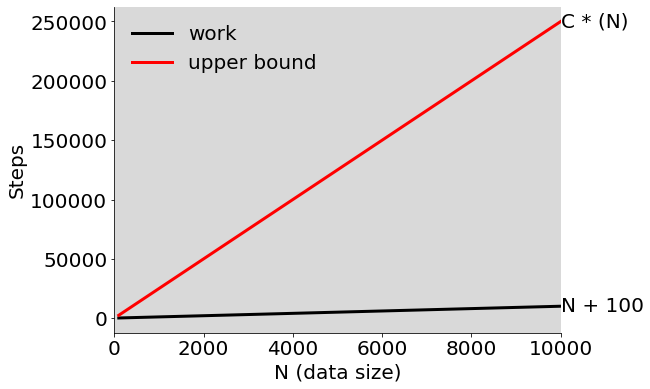

In [13]:
# Exercise 1: show N+100 is in O(N).
ax = scale_ax()
ax.set_xlim(0, 1e4) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N", C=25, minN=6) # TODO: pass C and minN

/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


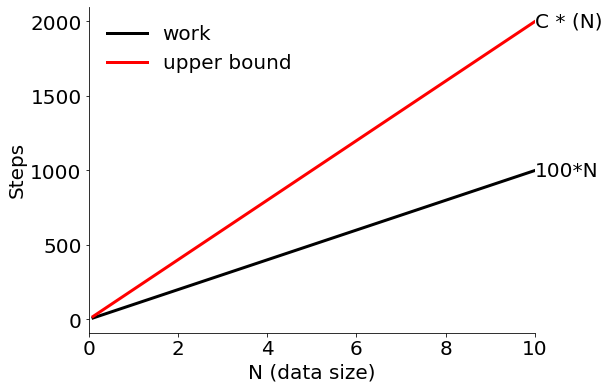

In [15]:
# Exercise 2: show 100*N is in O(N).
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "100*N")

upper_bound(ax, order="N", C=200)

/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


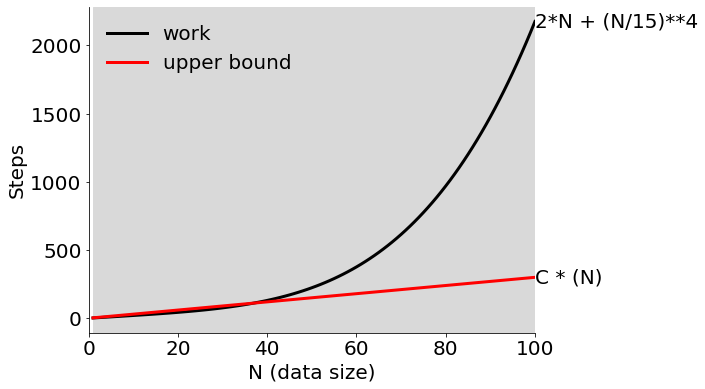

In [18]:
# Exercise 4: try to show 2*N + (N/15)**4 is in O(N)
ax = scale_ax()
ax.set_xlim(0, 100)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N",C=3, minN = 1)

/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


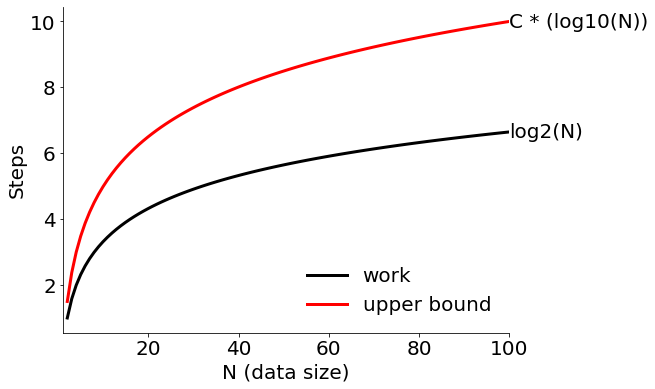

In [24]:
# Exercise 5: show log2(N) is in O(log10(N))
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "log2(N)")

upper_bound(ax, order="log10(N)", C = 5)

In [27]:
log2(10)

3.321928094887362

/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


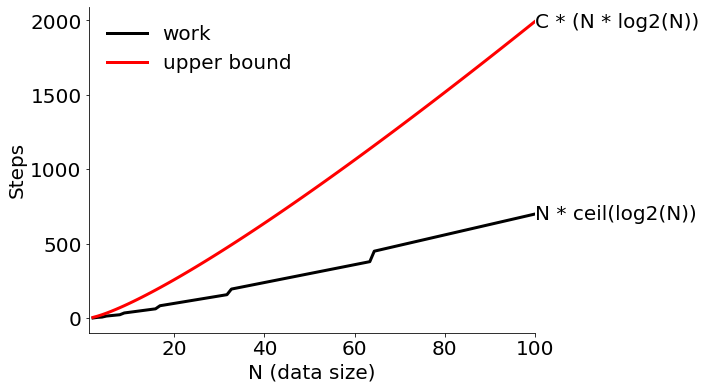

In [33]:
# Exercise 6: show ceil(log2(N)) is in O(log N)
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "N * ceil(log2(N))")

upper_bound(ax, order="N * log2(N)", C=3)

/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


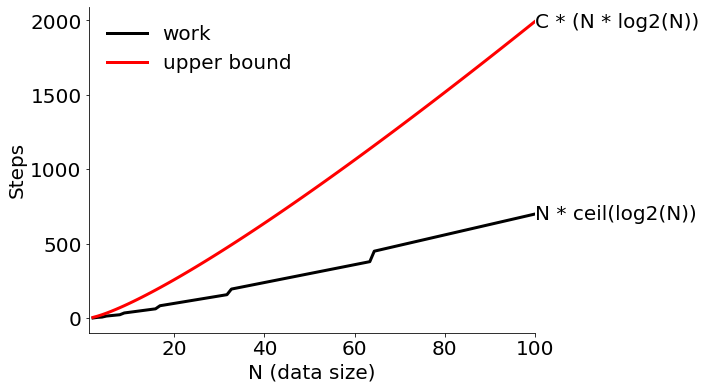

In [35]:
# Exercise 7: show N * ceil(log2(N)) is in O(N log N)
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "N * ceil(log2(N))")

upper_bound(ax, order="N * log2(N)", C=3)

/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/home/zdai1007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


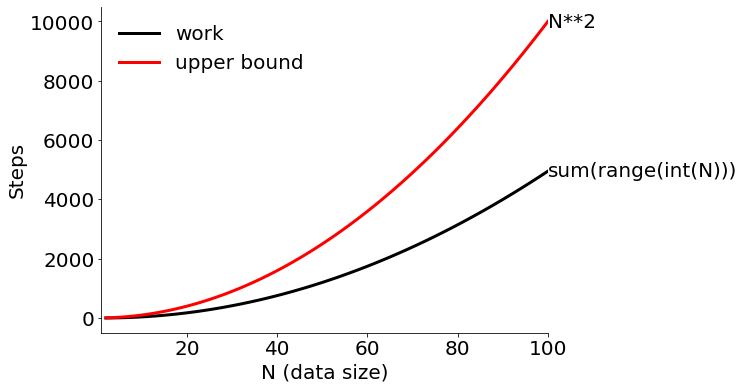

In [38]:
# Exercise 8: show F(N) = 0+1+2+...+(N-1) is in O(N**2)
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "sum(range(int(N)))")

upper_bound(ax, order="N**2")